###  Goal :The data is related with direct marketing campaigns of a Portuguese banking institution. The objective of this analysis is to predict if the client will subscribe a term deposit--2022-09-13

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Data Glance

In [2]:
df=pd.read_csv('C:\\Users\\hanfe\\Desktop\\数据练习\\bank-additional-full.csv\\bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.shape

(41188, 21)

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.nunique().sort_values(ascending=True)

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

Text(0.5, 1.0, 'Pie Chart of client subsription')

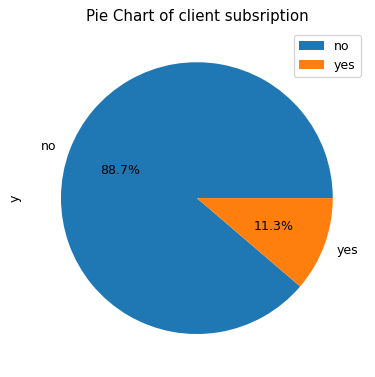

In [29]:
plt.figure(figsize=(5,5),dpi=90)
labels=round(df['y'].value_counts(normalize=True)*100,2)
df['y'].value_counts(normalize=True).plot.pie(legend=['Yes','NO'],autopct='%1.1f%%')
plt.title('Pie Chart of client subsription')

## Summary statistics
### 1. Data has 41188 rows and 21 features (variables)
### 2. Data had been clearned. It has no missing values
### 3. There were 11.3 per cent of clients has subscribed a term deposit. Pie chart shows that the target class is imbalanced

## 2.Data Visualization

<AxesSubplot:>

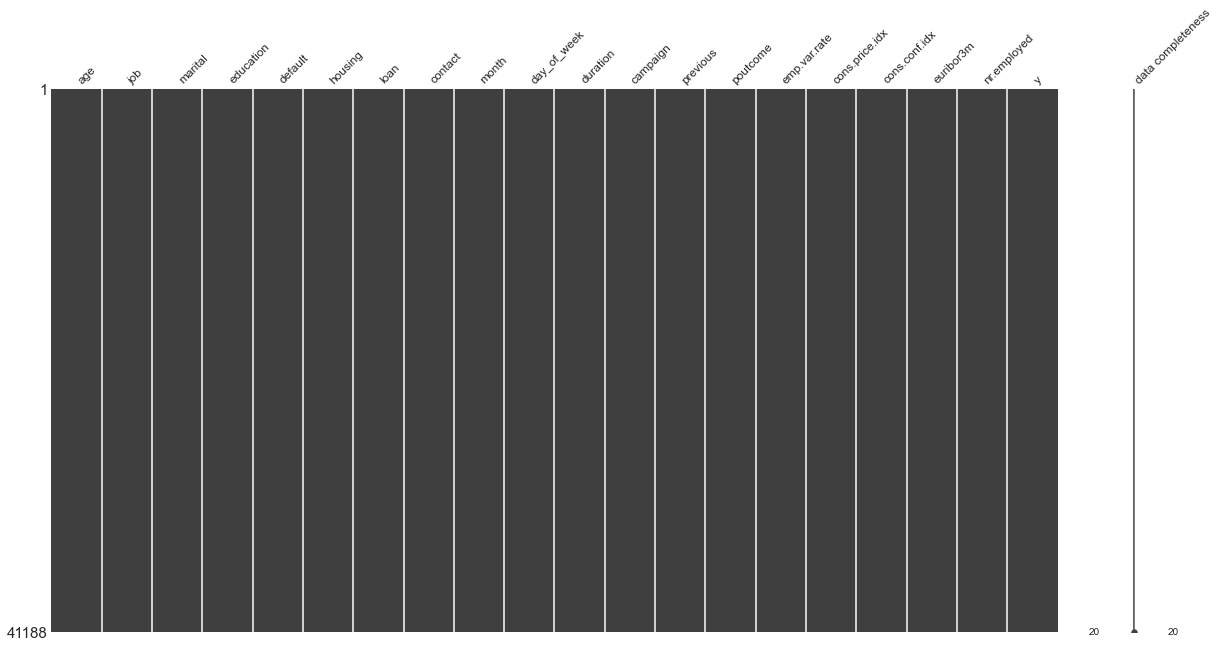

In [80]:
#2.1 missing value plot
!pip install missingno
import missingno as msno
msno.matrix(df,labels=[df.columns],figsize=(20,10),fontsize=12)

<Figure size 3600x1620 with 0 Axes>

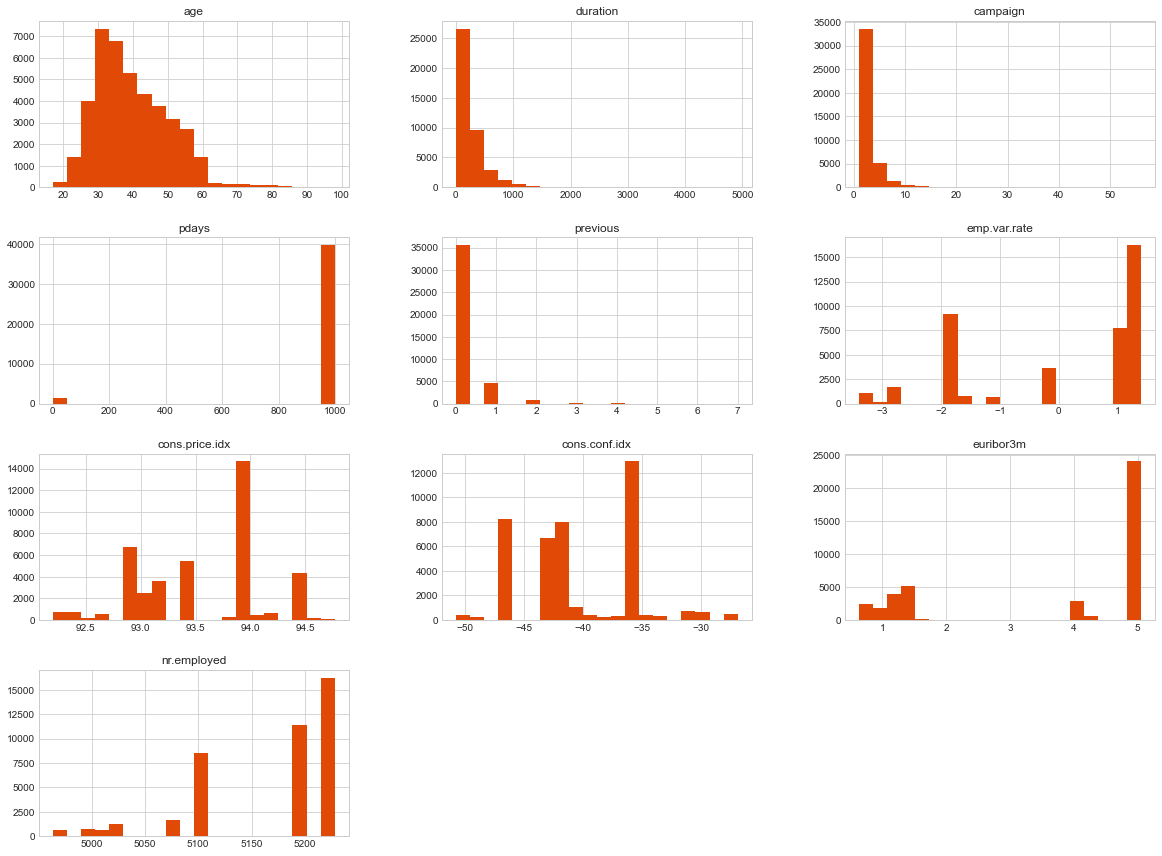

In [33]:
#Checking the data distribution of each Continuous variable
plt.figure(figsize=(40,18),dpi=90)
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(20,15), color='#E14906')
plt.show()

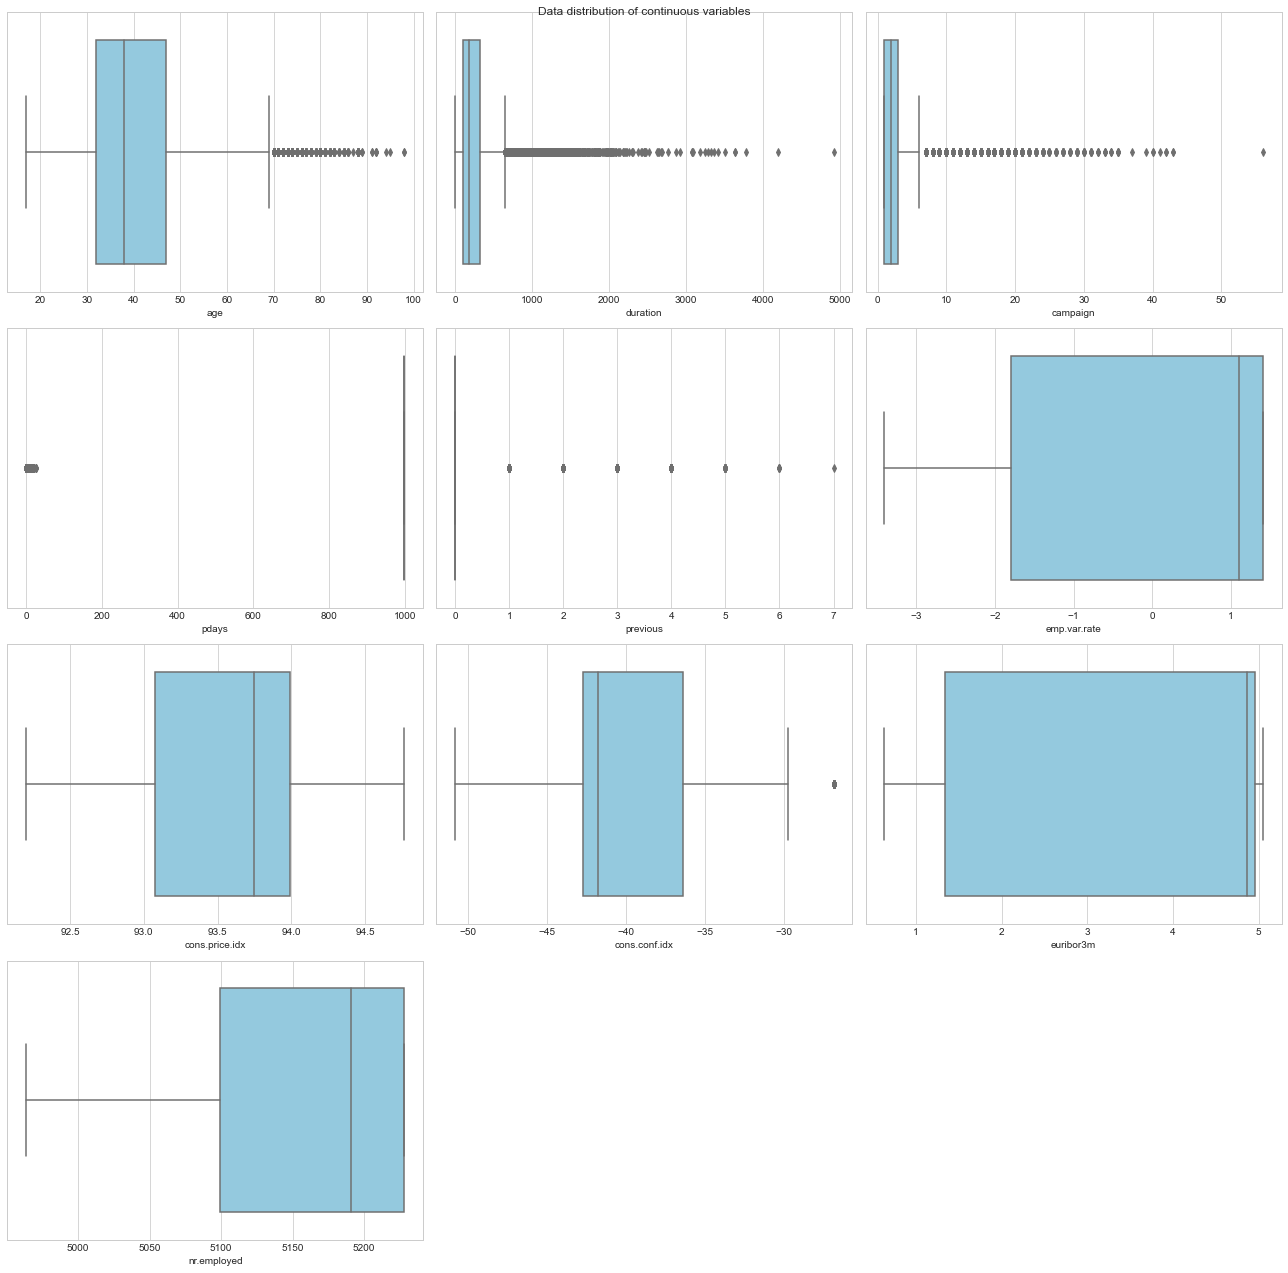

In [35]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='skyblue')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

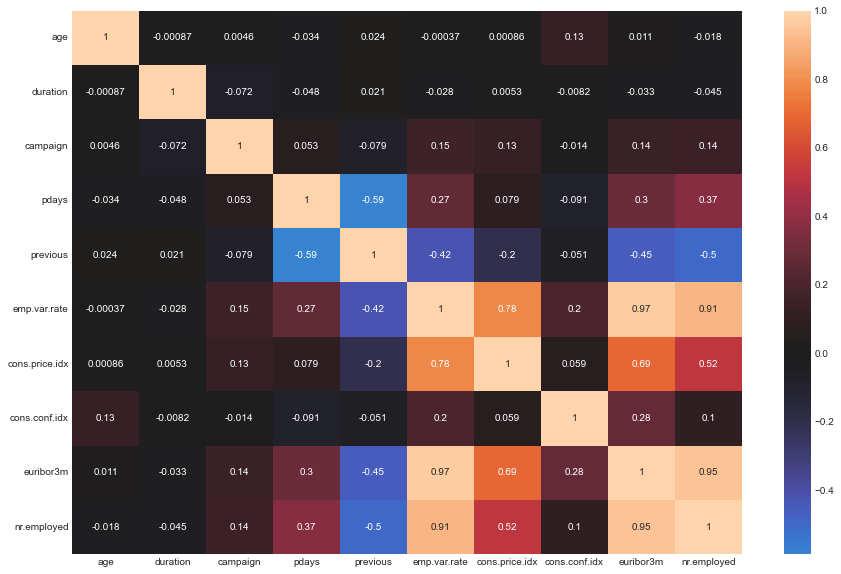

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=True,center = 0)
plt.show()

In [37]:
del df['pdays']#removing pdays to avoid multicollinearity

<AxesSubplot:xlabel='education', ylabel='count'>

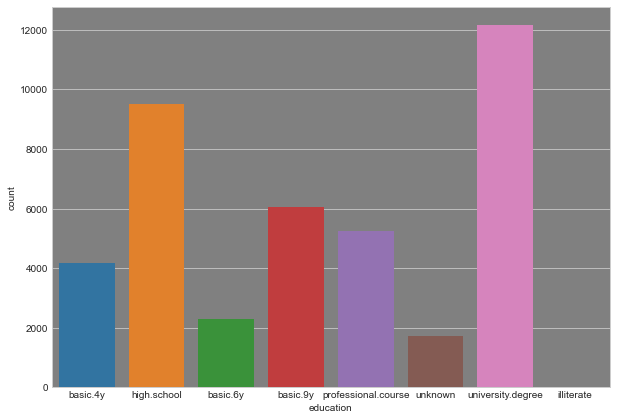

In [41]:
plt.figure(figsize=(10,7))
plt.rcParams['axes.facecolor'] = 'grey'
sns.countplot(x='education',data=df)

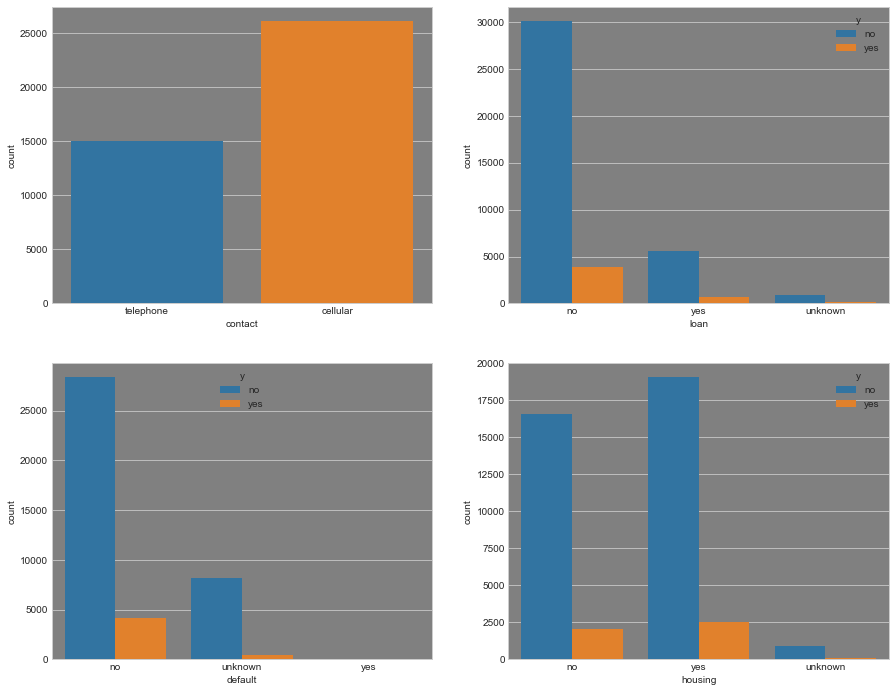

In [48]:
countplots=['contact','loan','default','housing']
plt.figure(figsize=(15,12))
for i in range(len(countplots)):
    if i==0:
        plt.subplot(2,2,i+1)
        sns.countplot(x=countplots[i],data=df)
    else:
        plt.subplot(2,2,i+1)
        sns.countplot(x=countplots[i],data=df,hue='y')

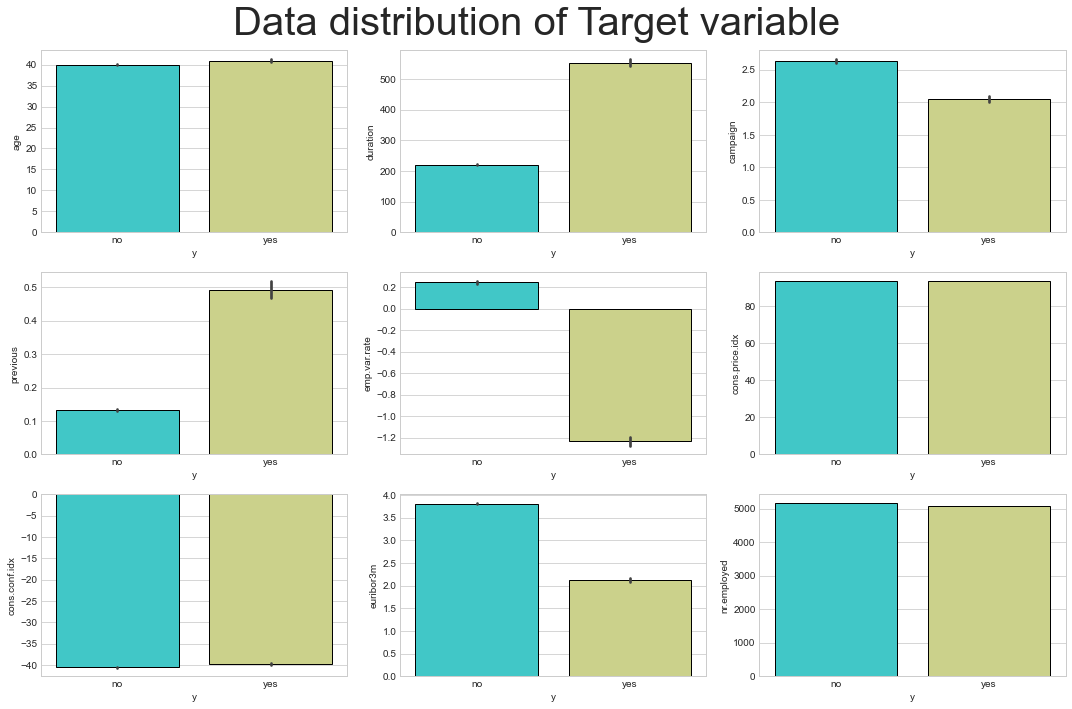

In [49]:
#Data distribution of Target variable (box plot)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(3,3, i+1)
    sns.barplot(data=df,x='y', y=col, ax=ax,edgecolor="black",palette='rainbow')
font= {'fontsize':25,'color': 'grey'}
plt.suptitle('Data distribution of Target variable',fontsize=40)
plt.tight_layout()

In [50]:
df['y']=df['y'].map({'yes':1,'no':0})

In [51]:
df1=pd.get_dummies(df,drop_first=True)#applying One-Hot Encoding

In [52]:
X=df1.drop(['y'],axis=1)
y=df1['y']

In [53]:
X.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


In [54]:
#Feature Selection#
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X.values, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=40)
X_train,y_train=sm.fit_resample(X_train,y_train)

C:\Users\hanfe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


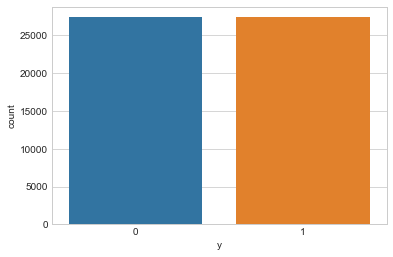

In [57]:
sns.countplot(y_train)
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### 3. Modeling

In [61]:
#importing different classification models
!pip install xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

     --------------------------------------- 89.1/89.1 MB 11.3 MB/s eta 0:00:00


In [62]:
model_comparison={}

 ### 3.1Logistic Regression model

In [63]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Logistic Regression']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 85.35%
Model F1-Score : 83.44%
Cross Val Accuracy: 85.63 %
Cross Val Standard Deviation: 0.69 %
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      8020
           1       0.83      0.42      0.56      2277

    accuracy                           0.85     10297
   macro avg       0.84      0.70      0.74     10297
weighted avg       0.85      0.85      0.83     10297



### 3.2 Decision Tree

In [65]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 88.33%
Model F1-Score : 88.09%
Cross Val Accuracy: 90.85 %
Cross Val Standard Deviation: 14.42 %
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      9023
           1       0.53      0.48      0.51      1274

    accuracy                           0.88     10297
   macro avg       0.73      0.71      0.72     10297
weighted avg       0.88      0.88      0.88     10297



### 3.3 KNN model

In [70]:
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 87.92%
Model F1-Score : 86.86%
Cross Val Accuracy: 91.77 %
Cross Val Standard Deviation: 1.40 %
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      8523
           1       0.73      0.48      0.58      1774

    accuracy                           0.88     10297
   macro avg       0.81      0.72      0.75     10297
weighted avg       0.87      0.88      0.87     10297



### 3.4 RandomForest Model

In [73]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 90.03%
Model F1-Score : 90.14%
Cross Val Accuracy: 93.47 %
Cross Val Standard Deviation: 6.27 %
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9198
           1       0.53      0.56      0.55      1099

    accuracy                           0.90     10297
   macro avg       0.74      0.75      0.74     10297
weighted avg       0.90      0.90      0.90     10297



### 3.5 Naive Bayes

In [72]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Naive Bayes']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 76.80%
Model F1-Score : 72.93%
Cross Val Accuracy: 78.67 %
Cross Val Standard Deviation: 0.24 %
              precision    recall  f1-score   support

           0       0.77      0.97      0.85      7250
           1       0.78      0.30      0.43      3047

    accuracy                           0.77     10297
   macro avg       0.77      0.63      0.64     10297
weighted avg       0.77      0.77      0.73     10297



### 3.6 Xg Boost

In [74]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 91.08%
Model F1-Score : 91.13%
Cross Val Accuracy: 91.97 %
Cross Val Standard Deviation: 10.13 %
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9172
           1       0.59      0.61      0.60      1125

    accuracy                           0.91     10297
   macro avg       0.77      0.78      0.77     10297
weighted avg       0.91      0.91      0.91     10297



### Models Comparison

In [76]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='rainbow')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Xg Boost,91.08%,91.13%,91.97%,10.13%
KNN,90.03%,90.14%,93.47%,6.27%
Decision Tree,88.33%,88.09%,90.85%,14.42%
Logistic Regression,85.35%,83.44%,85.63%,0.69%
Naive Bayes,76.80%,72.93%,78.67%,0.24%


In [77]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Xg Boost,91.08%,91.13%,91.97%,10.13%
KNN,90.03%,90.14%,93.47%,6.27%
Decision Tree,88.33%,88.09%,90.85%,14.42%
Logistic Regression,85.35%,83.44%,85.63%,0.69%
Naive Bayes,76.80%,72.93%,78.67%,0.24%


In [78]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Xg Boost,91.08%,91.13%,91.97%,10.13%
KNN,90.03%,90.14%,93.47%,6.27%
Decision Tree,88.33%,88.09%,90.85%,14.42%
Logistic Regression,85.35%,83.44%,85.63%,0.69%
Naive Bayes,76.80%,72.93%,78.67%,0.24%
